<a href="https://colab.research.google.com/github/dan-august0/Python_DataScience/blob/main/Seaborn_Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#Tema padrão do seaborn
sns.set_theme()

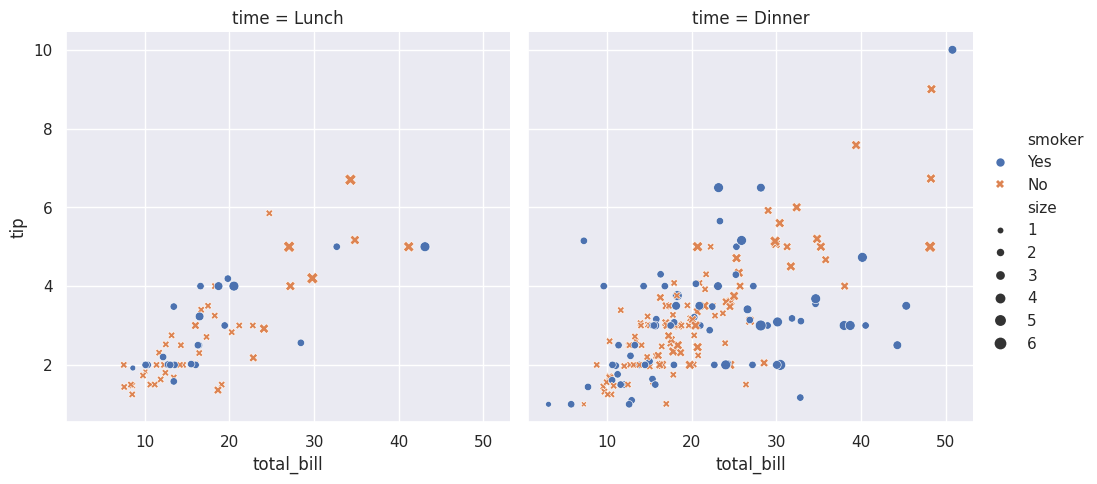

In [4]:
#Relplot com 'tips'
tips = sns.load_dataset("tips")
tips.head()

g = sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
plt.show()

**Explicação:**

relplot() é para relações entre variáveis (por padrão cria scatter).

col="time" cria colunas separadas (ex.: Lunch x Dinner).

hue, style, size mapeiam variáveis do DataFrame para cor, marcador e tamanho — o seaborn traduz isso automaticamente para argumentos do matplotlib.

**O que observar:** duas colunas (Lunch/Dinner), legendas automáticas, variação de tamanhos de ponto conforme size.

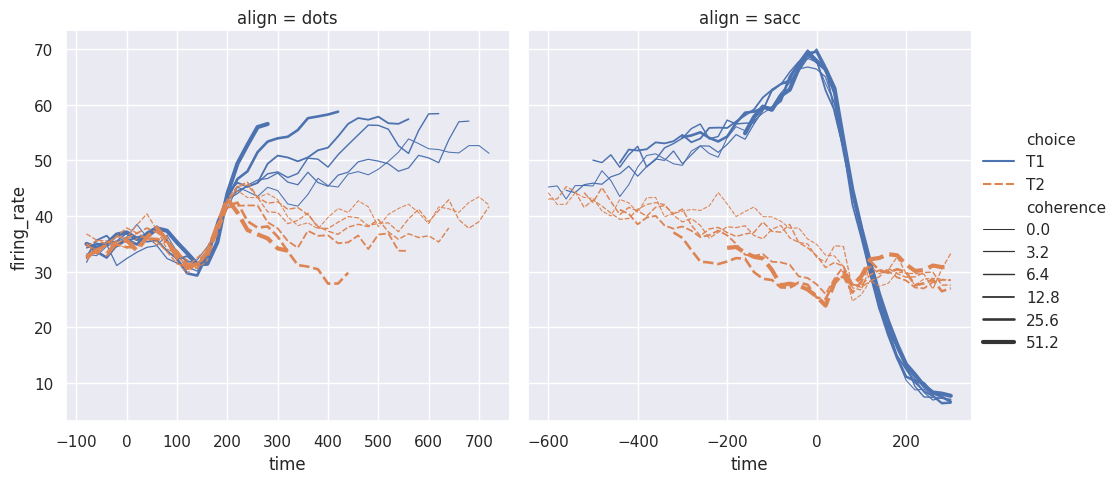

In [5]:
#relplot com linhas (dataset 'dots')
dots = sns.load_dataset("dots")
g = sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

**Explicação:** kind="line" troca o tipo visual: linhas em vez de pontos. Parâmetros como size e style agora afetam espessura e traço da linha.

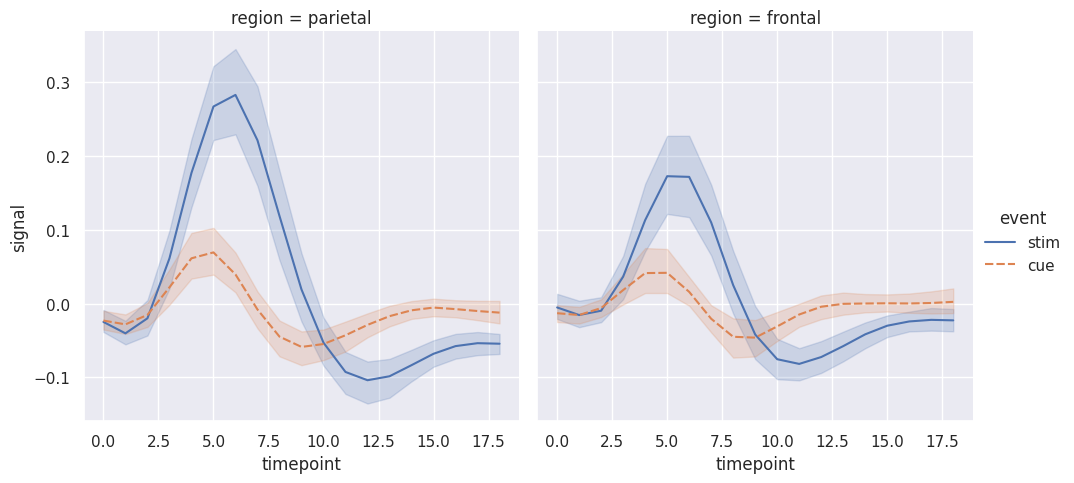

In [6]:
#Estimativa com CI (dataset 'fmri')
fmri = sns.load_dataset("fmri")
g = sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)
plt.show()

**Explicação:** quando seaborn estima valores (média por tempo, por exemplo), ele desenha intervalos de confiança (por padrão usa bootstrap). Esses "shaded bands" mostram incerteza.

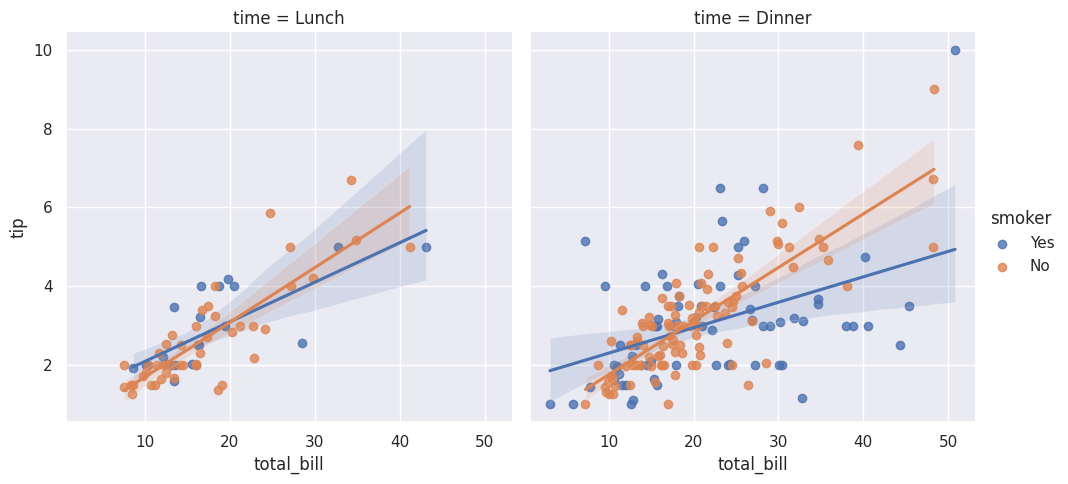

In [7]:
#lmplot (regressão linear com CI)
g = sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
plt.show()

**Explicação:** lmplot() encaixa um modelo linear (regressão) e plota linha de tendência + intervalo de confiança.

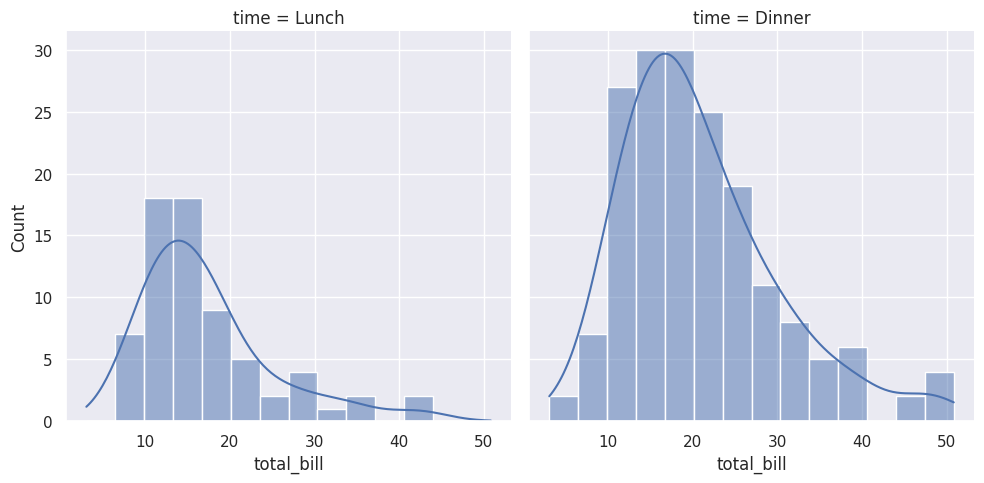

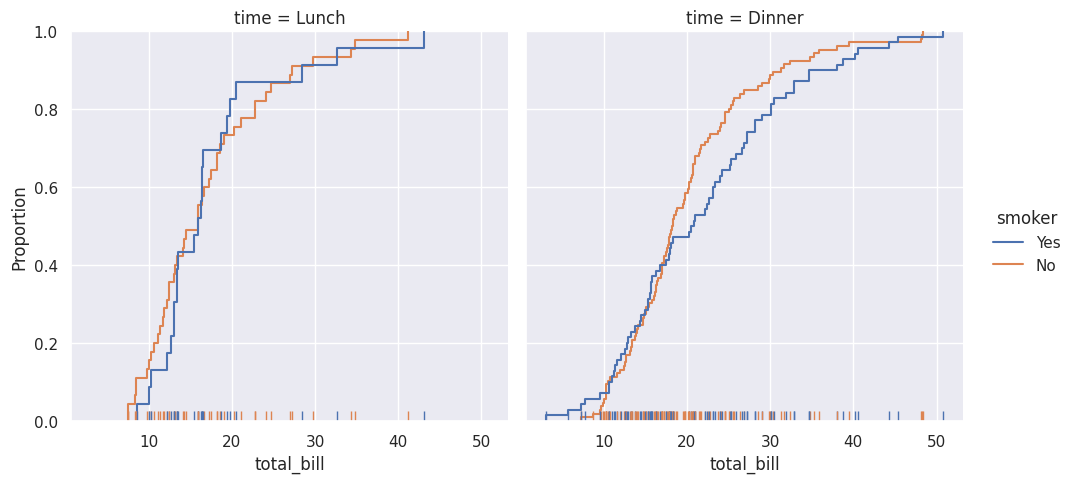

In [10]:
#Hist + kde
sns.displot(data=tips, x="total_bill", col="time", kde=True)
plt.show()
#ECDF (displot kind="ecdf")
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)
plt.show()

**Explicação:** displot é versátil: histogramas, KDEs e ECDFs. rug=True desenha pequenas marcas onde há observações (útil para densidade).

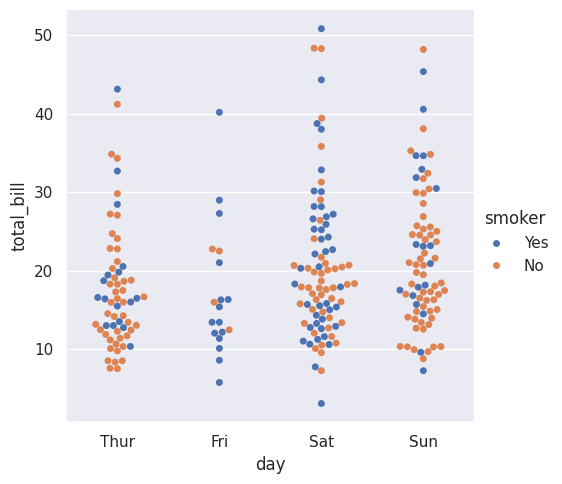

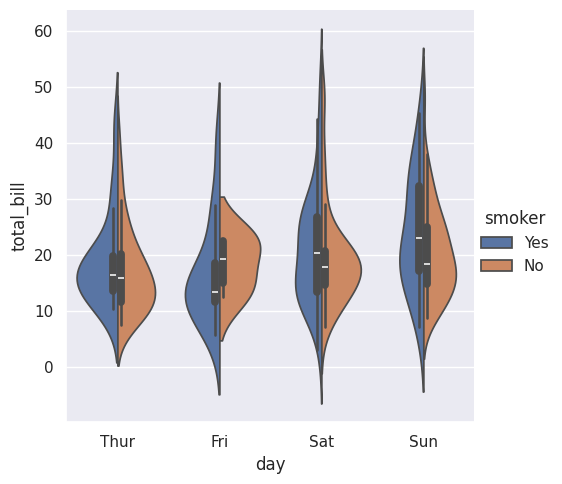

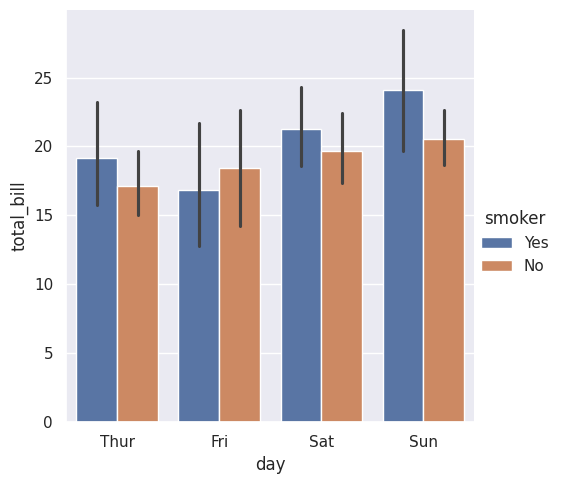

In [11]:
#Swarm (todos os pontos, ajustados para não sobrepor)
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")
plt.show()

#Violin (densidade por categoria)
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
plt.show()

#Bar (média + intervalo de confiança)
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")
plt.show()

swarmplot pode ficar lento com muitos pontos. Para conjuntos grandes, prefira stripplot com jitter ou violin.

bar mostra médias com intervalo de confiança por padrão — você pode passar ci=None para remover CI ou ci=95 para mudar.

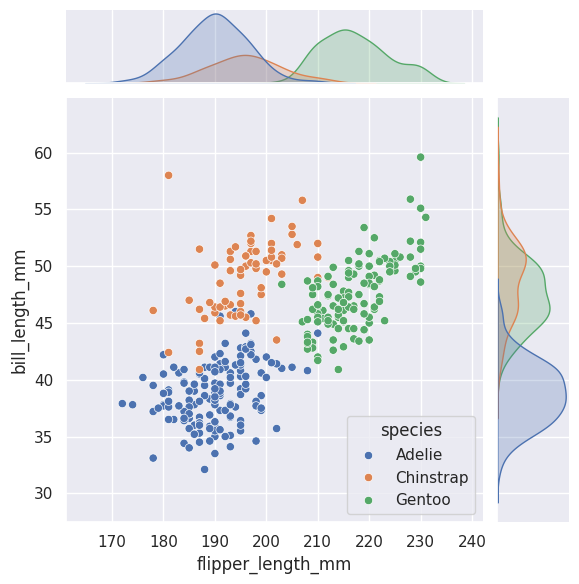

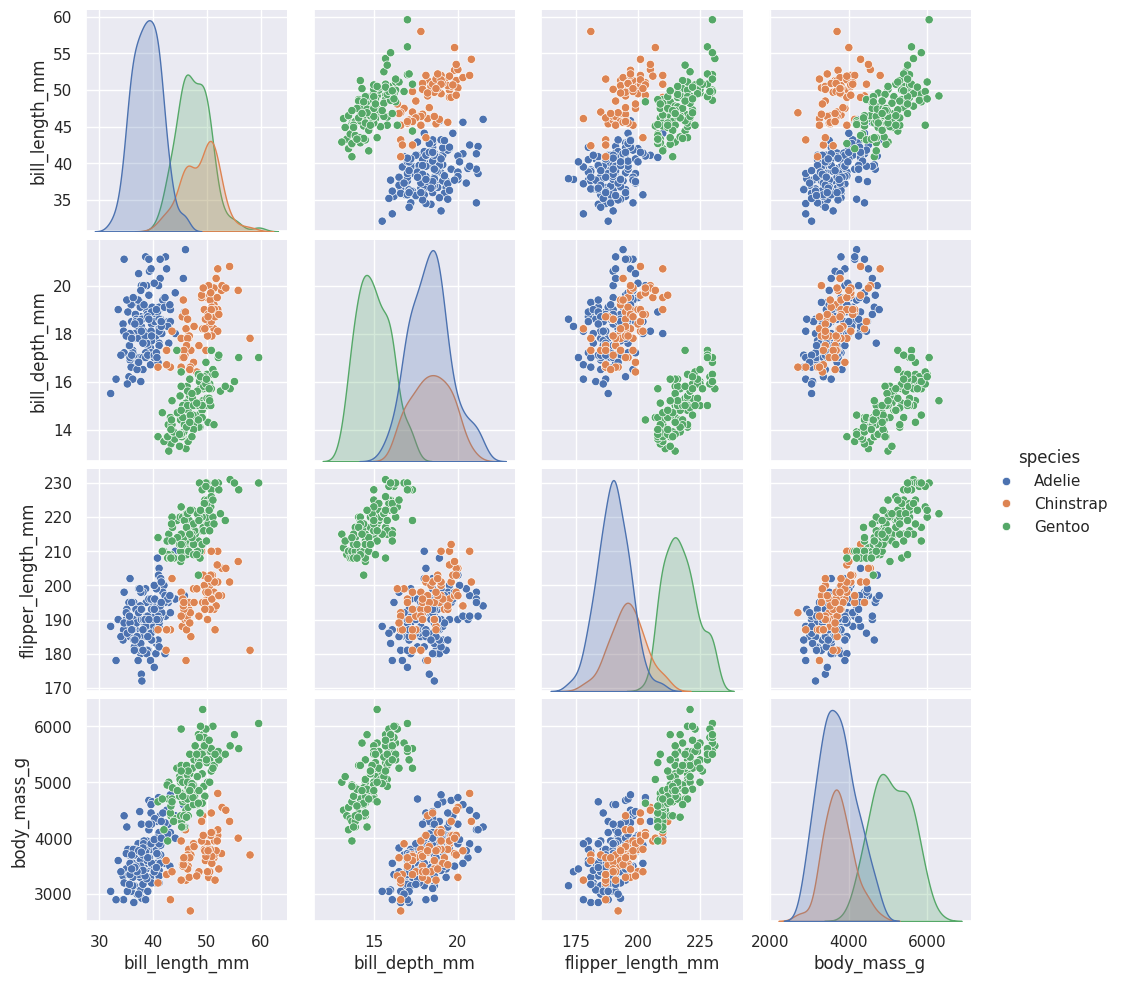

In [12]:
#Jointplot
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")
plt.show()

#Pairplot (todas as combinações)
sns.pairplot(data=penguins.dropna(), hue="species")
plt.show()

**Explicação:**

jointplot foca na relação entre duas variáveis e mostra marginais.

pairplot produz uma matriz de gráficos para todas as combinações par-a-par (útil para inspeção exploratória).

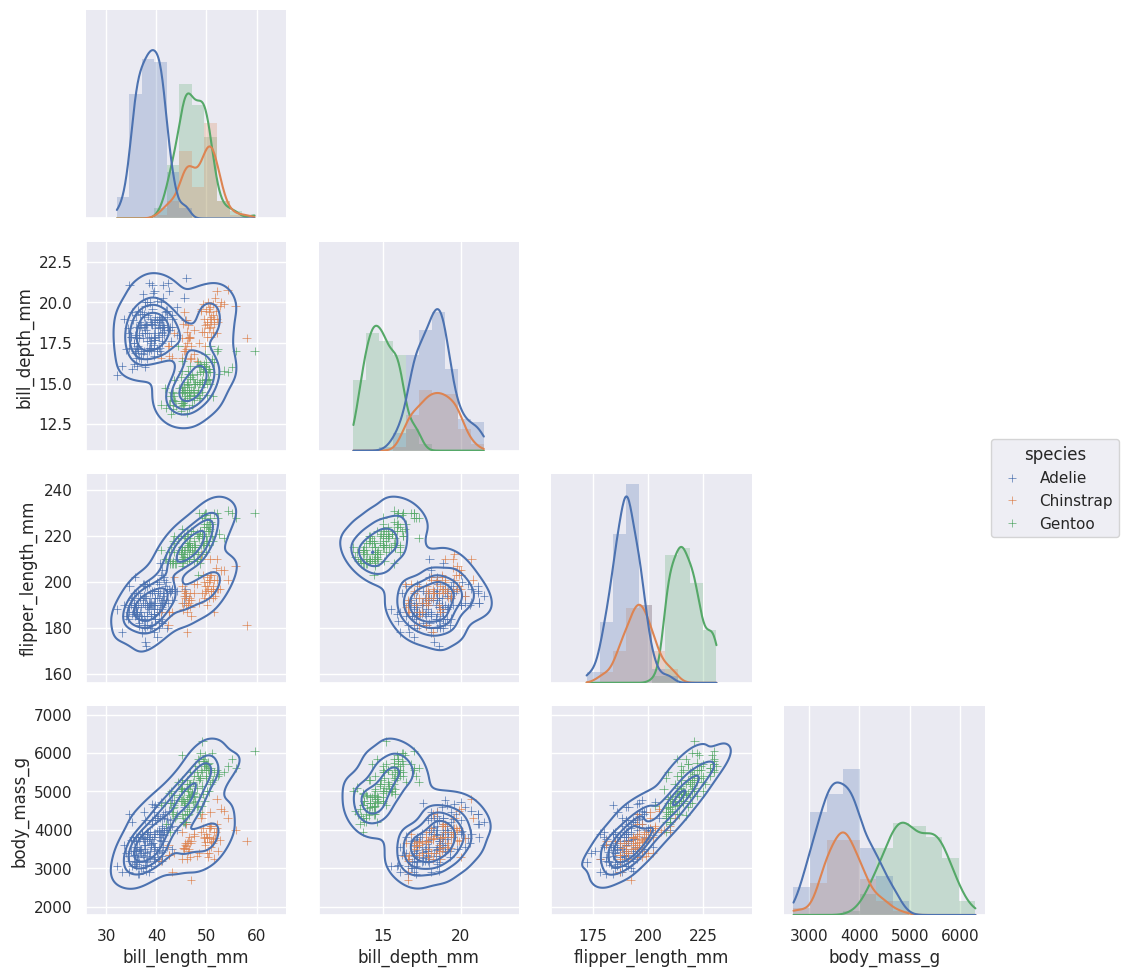

In [13]:
#PairGrid com mapeamentos customizados
p = penguins.dropna()
g = sns.PairGrid(p, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5)
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
plt.show()

**Explicação:** PairGrid dá controle total: você escolhe o que desenhar em cada porção da grade.

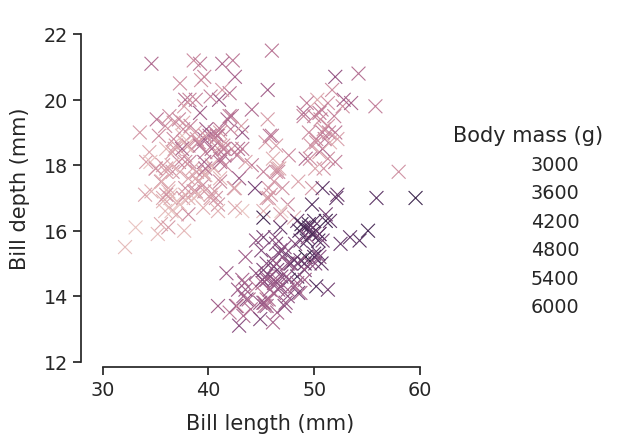

Salvou: penguins_scatter.png


In [14]:
#Customização fina
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    marker="x", s=100
)

g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
# ajustar título da legenda (se houver)
if g._legend is not None:
    g._legend.set_title("Body mass (g)")
# tamanho da figura (polegadas)
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

# Salvar em alta resolução
g.figure.savefig("penguins_scatter.png", dpi=300, bbox_inches="tight")
plt.show()
print("Salvou: penguins_scatter.png")

**Notas:**
sns.set_theme(style="ticks", font_scale=1.25) muda estilo global.

Para personalizações muito específicas, você pode "descer" para o matplotlib (g.figure, g.ax, etc.).

savefig() salva o arquivo no diretório de trabalho do Colab (você pode fazer download pelo painel lateral ou por comandos files.download).